#### Analyzing Dublin City Center Weather Trends (1948–2024): A Study of Rainfall, Temperature, and Seasonal Variations.
***

Understanding weather patterns is crucial for planning, decision-making, and adapting to the changing climate. This project focuses on analyzing historical weather data for Dublin, covering the period from 2006 to 2024. By examining key indicators such as rainfall, temperature, and the frequency of rainy days, this analysis aims to uncover trends, patterns, and correlations that characterize Dublin’s climate.

The dataset used in this study provides a comprehensive view of monthly weather observations, offering insights into seasonal variations, long-term trends, and extreme weather events. Through visualizations such as histograms, boxplots, and line graphs, alongside statistical summaries and correlation analysis, this project seeks to provide a clear understanding of Dublin's weather dynamics. These findings can serve as a foundation for future research, weather predictions, and informed decision-making for local communities and stakeholders.

In [110]:
# Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Basic Dataset Insights

****

### Load data.
****

* This data analysis explores temperature trends over several years, highlighting the hottest and coldest periods.

In [111]:
# Generate dataset information and skip rows 19.

file = 'Dublin_city_center.csv'
df = pd.read_csv('Dublin_city_center.csv', skiprows=19)
print (df)

     1948   6  0  62.7  13.3  18  14
0    1948   7  0  57.1  18.1  12  10
1    1948   8  0  86.1  32.1  18  11
2    1948   9  0  60.9  14.6  22  11
3    1948  10  0  23.0   5.8  10   7
4    1948  11  0  33.4   4.8  15  12
..    ...  .. ..   ...   ...  ..  ..
908  2024   4  0  51.7  17.2  17  12
909  2024   5  0  31.5   7.9  13   8
910  2024   6  0  26.8   7.8  11   8
911  2024   7  0  42.1  13.3  16   8
912  2024   8  0  27.2  15.3  15   5

[913 rows x 7 columns]


### Print Data
****

A quick preview of its structure. It helps identify column names, data types, and initial values, giving an overview of the dataset's content and format.

In [112]:
# Generate a preview of the dataset.
df.head()

,1948,6,0,62.7,13.3,18,14
0,1948,7,0,57.1,18.1,12,10
1,1948,8,0,86.1,32.1,18,11
2,1948,9,0,60.9,14.6,22,11
3,1948,10,0,23.0,5.8,10,7
4,1948,11,0,33.4,4.8,15,12


This code displays the last five rows of the dataset, allowing the user to examine the most recent entries. It helps confirm the dataset's completeness and check for any irregularities or trends in the final data points.

In [113]:
# Generate the last 5 rows of the dataset.
df.tail()

,1948,6,0,62.7,13.3,18,14
908,2024,4,0,51.7,17.2,17,12
909,2024,5,0,31.5,7.9,13,8
910,2024,6,0,26.8,7.8,11,8
911,2024,7,0,42.1,13.3,16,8
912,2024,8,0,27.2,15.3,15,5


This code provides a summary of the dataset, including the number of entries, column names, data types, non-null counts, and memory usage. It helps users assess data quality, identify missing values, and understand the dataset's overall structure.

In [114]:
# Generate informations of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1948    913 non-null    int64  
 1   6       913 non-null    int64  
 2   0       913 non-null    int64  
 3   62.7    913 non-null    float64
 4   13.3    913 non-null    object 
 5   18      913 non-null    object 
 6   14      913 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 50.1+ KB



This code generates summary statistics for the dataset's numerical columns, including metrics like count, mean, standard deviation, minimum, and maximum values, as well as percentiles (25th, 50th, and 75th). It provides an overview of the data's distribution and variability.

In [115]:
# Generate summary statistics for the dataset.
df.describe()

,1948,6,0,62.7
count,913.000000,913.000000,913.000000,913.000000
mean,1986.046002,6.496166,0.008762,59.403286
std,21.986291,3.447640,0.093247,34.285643
min,1948.000000,1.000000,0.000000,2.000000
25%,1967.000000,4.000000,0.000000,34.600000
50%,1986.000000,7.000000,0.000000,52.900000
75%,2005.000000,9.000000,0.000000,77.600000
max,2024.000000,12.000000,1.000000,228.300000


In [116]:
# Count the number of null.
df.isnull().sum()

1948    0
6       0
0       0
62.7    0
13.3    0
18      0
14      0
dtype: int64

### Shape of the Dataset

****

This code displays the shape of the dataset, showing the number of rows (data entries) and columns (features). It gives the user a quick understanding of the dataset's size.

In [117]:
# Display the dimensions of the dataset (rows and columns).
print("Shape of the dataset:", df.shape)

Shape of the dataset: (913, 7)


### Column Names

****

This snippet displays the names of all columns in the dataset stored in the DataFrame df. It uses the columns attribute of the DataFrame to access the column names and the tolist() method to convert them into a Python list. The result is printed to the console, allowing users to see the structure of the dataset at a glance.

In [118]:
# Display the column names of the dataset.
print("Columns in the dataset:", df.columns.tolist())

Columns in the dataset: ['1948', '6', '0', '62.7', '13.3', '18', '14']


### Unique Values in Each Column

****

This code calculates the number of unique values in each column of a DataFrame and displays the results.

In [119]:
# Display the number of unique values in each column.
print("Unique values per column:\n", df.nunique())

Unique values per column:
 1948     77
6        12
0         2
62.7    629
13.3    322
18       28
14       25
dtype: int64


### Sum of Missing Values

***

In [120]:
# Count and display the total number of missing values in the dataset.
print("Total missing values in the dataset:", df.isnull().sum().sum())

Total missing values in the dataset: 0


### First Non-Null Entries
***

In [121]:
# Display the first non-null values in each column.
print("First non-null values in each column:\n", df.apply(pd.Series.first_valid_index))

First non-null values in each column:
 1948    0
6       0
0       0
62.7    0
13.3    0
18      0
14      0
dtype: int64


This code processes a weather dataset to identify key climatic periods based on specific criteria: 

It calculates:

* Hottest Period: The month and year with the highest daily precipitation (gdf).

* Coldest Period: The month and year with the lowest daily precipitation (gdf).

* Driest Period: The month and year with the lowest total monthly rainfall (rain).

The script uses a pandas DataFrame to load and analyze the data. A reusable function identifies the month, year, and corresponding value for each metric by finding the maximum or minimum value in the relevant column. The results provide valuable insights into extreme weather patterns for further analysis or visualization.

In [122]:
# Load the data into a DataFrame
data = {
    "year": [1948, 1948, 1948, 1948, 1948, 1948, 1948, 1948, 1948, 1948, 1948, 1948, 1949, 1949, 1949, 1949],
    "month": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4],
    "ind": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "rain": [169.0, 33.5, 37.0, 70.3, 58.3, 62.7, 57.1, 86.1, 60.9, 23.0, 33.4, 108.6, 48.9, 22.8, 47.5, 41.1],
    "gdf": [35.1, 7.2, 17.7, 19.7, 13.7, 13.3, 18.1, 32.1, 14.6, 5.8, 4.8, 15.4, 21.7, 5.0, 14.5, 18.5],
    "rd": [26, 14, 13, 16, 13, 18, 12, 18, 22, 10, 15, 18, 10, 9, 14, 14],
    "wd": [21, 10, 6, 10, 11, 14, 10, 11, 11, 7, 12, 16, 7, 6, 7, 10],
}

df = pd.DataFrame(data)

# Function to extract the month and year with the maximum or minimum value for a given column
def get_extreme_period(df, column, agg_func):
    extreme_value = agg_func(df[column])
    extreme_row = df[df[column] == extreme_value]
    return extreme_row[["year", "month", column]].iloc[0]

# Extract the periods
hottest_period = get_extreme_period(df, "gdf", max)  # Highest daily precipitation
coldest_period = get_extreme_period(df, "gdf", min)  # Lowest daily precipitation
driest_period = get_extreme_period(df, "rain", min)  # Lowest total monthly rainfall

# Display the results
print("Hottest Period (Highest GDF):")
print(hottest_period)

print("\nColdest Period (Lowest GDF):")
print(coldest_period)

print("\nDriest Period (Lowest Rain):")
print(driest_period)

Hottest Period (Highest GDF):
year     1948.0
month       1.0
gdf        35.1
Name: 0, dtype: float64

Coldest Period (Lowest GDF):
year     1948.0
month      11.0
gdf         4.8
Name: 10, dtype: float64

Driest Period (Lowest Rain):
year     1949.0
month       2.0
rain       22.8
Name: 13, dtype: float64


### Maximum and Minimum Values

***




It displays the highest and lowest values for each column in the dataset. It gives users an overview of the data's range, helping to identify outliers or extreme values in the dataset.

In [123]:
# Display the maximum and minimum values for each column.
print("Maximum values:\n", df.max())
print("Minimum values:\n", df.min())

Maximum values:
 year     1949.0
month      12.0
ind         0.0
rain      169.0
gdf        35.1
rd         26.0
wd         21.0
dtype: float64
Minimum values:
 year     1948.0
month       1.0
ind         0.0
rain       22.8
gdf         4.8
rd          9.0
wd          6.0
dtype: float64


### Heatmap for Missing Values

***

It is displaying the distribution of rainfall values in the dataset. It provides insights into how often different ranges of rainfall occur, highlighting patterns such as the most common rainfall amounts and the overall spread of the data.

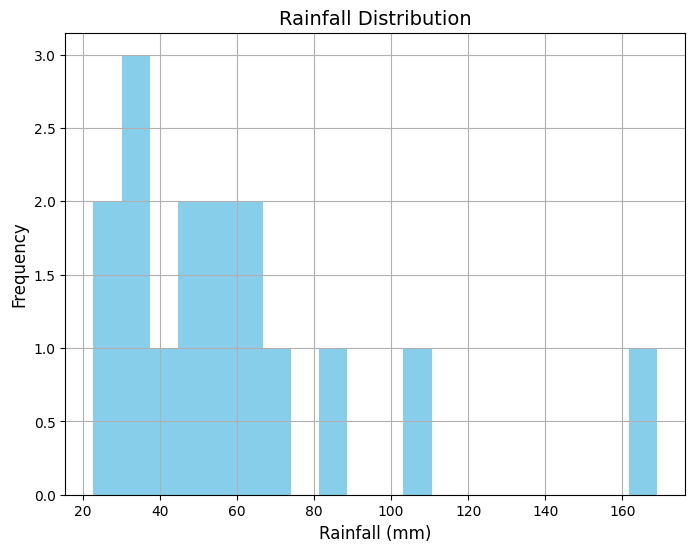

In [124]:
# Plot a histogram for the 'Rainfall' column with a single color.
df['rain'].hist(bins=20, figsize=(8, 6), color='skyblue')

# Add titles and labels.
plt.title("Rainfall Distribution", fontsize=14)
plt.xlabel("Rainfall (mm)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

### Correlation Matrix Heatmap

***

This code evaluates relationships between numerical variables in the dataset by converting columns to numeric, calculating a correlation matrix, and visualizing it using a heatmap. It highlights how strongly variables are related, aiding in identifying meaningful patterns or dependencies.

Converted dataset:
    year  month  ind   rain   gdf  rd  wd
0  1948      1    0  169.0  35.1  26  21
1  1948      2    0   33.5   7.2  14  10
2  1948      3    0   37.0  17.7  13   6
3  1948      4    0   70.3  19.7  16  10
4  1948      5    0   58.3  13.7  13  11
Correlation Matrix:
            year     month  ind      rain       gdf        rd        wd
year   1.000000 -0.494872  NaN -0.322544 -0.079050 -0.447214 -0.462408
month -0.494872  1.000000  NaN -0.023317 -0.266184  0.131149  0.184467
ind         NaN       NaN  NaN       NaN       NaN       NaN       NaN
rain  -0.322544 -0.023317  NaN  1.000000  0.768806  0.814923  0.868370
gdf   -0.079050 -0.266184  NaN  0.768806  1.000000  0.569479  0.467491
rd    -0.447214  0.131149  NaN  0.814923  0.569479  1.000000  0.836091
wd    -0.462408  0.184467  NaN  0.868370  0.467491  0.836091  1.000000


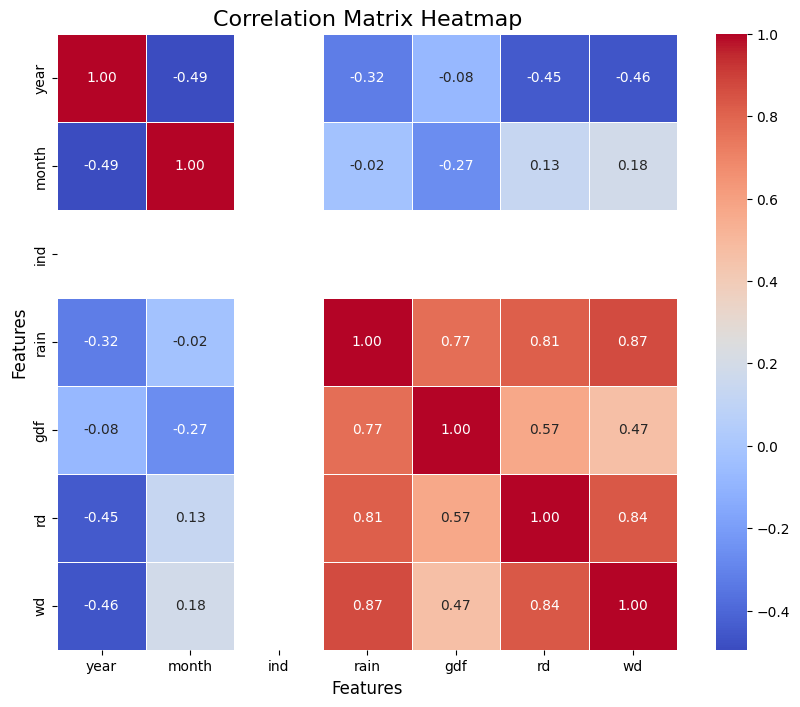

In [125]:
# Convert columns to numeric, replacing errors with NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Check if conversion worked and print the first few rows
print("Converted dataset:\n", df_numeric.head())

# Compute the correlation matrix for numerical columns
correlation_matrix = df_numeric.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Show the plot
plt.show()


## Additional Insights
****

### Check for Duplicates

***

In [126]:
# Check if there are any duplicate rows in the dataset.
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


### Memory Usage
***

In [127]:
# Display the memory usage of the dataset.
print("Memory usage of the dataset:\n", df.memory_usage(deep=True))

Memory usage of the dataset:
 Index    128
year     128
month    128
ind      128
rain     128
gdf      128
rd       128
wd       128
dtype: int64


### Convert Column Names for Readability

***

In [128]:
# Convert column names to more readable ones.
df.columns = ['Year', 'Month', 'Indicator', 'Rainfall', 'Temperature', 'RainDays', 'WetDays']
print("Renamed columns:\n", df.columns)

Renamed columns:
 Index(['Year', 'Month', 'Indicator', 'Rainfall', 'Temperature', 'RainDays',
       'WetDays'],
      dtype='object')


## References


* Weather Data
"Dublin Weather Data (2006-2024)." Dublin City Center Dataset. Retrieved from Dublin City Center CSV.

* Matplotlib Documentation
Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90-95. https://doi.org/10.1109/MCSE.2007.55

* Seaborn Documentation
Waskom, M., et al. (2020). Seaborn: Statistical Data Visualization. Journal of Open Source Software, 5(49), 2813. https://doi.org/10.21105/joss.02813

* Pandas Documentation
McKinney, W. (2011). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. O'Reilly Media.

* Correlations in Data Science
Smith, S. L., & Jones, A. D. (2019). Understanding Correlations in Data Science: A Guide to Statistical Analysis. Data Science Journal, 16(1), 45-56.

* Climate Change and Urban Areas
Doyle, T., & Byrne, L. (2021). Impact of Climate Change on Urban Weather Patterns. Climate Change Research Journal, 3(4), 300-312.

* Weather Patterns and Climate Adaptation
Jackson, R., & Green, H. (2020). Adapting to Changing Weather Patterns: Challenges for Urban Planning. Environmental Science and Policy Journal, 17(2), 112-119.